[data]:https://media-exp1.licdn.com/dms/image/C4D03AQEc1tEytx6FrA/profile-displayphoto-shrink_400_400/0?e=1607558400&v=beta&t=pmxUWqXB0FlwQXi96LytH7GYYkph9sVJ4vXhEfcPikQ "Author"

![alt text][data]
- `Author : Pramil Paudel` <br> 
- `Subject : Introduction to data science` <br>
***
This project is about forcasting demand of particular product based on 'historical_data'. From an eagle eye point of view data contains total amount of order of a product. <br>

Including some packages we are going to implement in the product.

- Pandas
- Sklearn

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
print("LODED SUCCESSFULLY ---- ")   

LODED SUCCESSFULLY ---- 


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn import preprocessing  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
print("SK LEARN LOADED !!")

SK LEARN LOADED !!


/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Loading data and checking 
---

In [142]:
## Loading all data in four different pandas dataframe 
## Printing the data 
PROJECT_ROOT_DORECTORY = '~/Documents/FALL_2020/INTRO_DATASCIENCE/WEEKLY_PROJECT/week_five'
raw_df = pd.read_csv(PROJECT_ROOT_DORECTORY+"/data/Historical_Product_Demand.csv")
print("Product Demand data loaded in hpd_df................ ")
hpd_df = raw_df
hpd_df.describe()

Product Demand data loaded in hpd_df................ 


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


Looking in the above dataFrame description we can see, there are 1,048,575 total rows. There are 2160 different types of products. Amoung them data of **Product_1359** is maximally reoccuring. Maximum reoccurance in the data doesn't mean to say it has maximal demand rather, data book contains highest number of lines. So, we can group by the product and see the more details of each product too.

Meanwhile there are following columns in the original data : 
- Product_Code ( Product Identifier, it identifies the product uniquemess or lets say its a product ) 
- Warehouse ( It represents the site where demenad was created ) 
- Product_Category (It is a column classifying the product type ) 
- Date, it represents the data on which demand was placed 
- Order_Demand, this represents the total amount of demand done in a #of demand

In [84]:
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


### Checking if there are any null values 

In [85]:
hpd_df.isnull().sum(axis = 0)

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

It means there are rows where 'date' column is null. So if we comes to the point to use date as a feature, it is nice idea either drop them or update with some value. If we use arbitary value we shall use certain date, which will not impact the demand forcasting. Or lets say we can not use a date, increasing the total demand or decreasing the total amount of demand etc

In [86]:
hpd_df = hpd_df.dropna()

## **Category Wies demand**
----
Since many products are classified under same **Product_Category**, we can group by the data using **Product_Category** and Sum the **Order_Demand** so that we can find total amount of demand for particular product. Lets try ...

There was an issue regarding sum() of the Order_Demand. It appers to be in the form of string which caused sum() function to contatenate the values instead of summation. So, I tried to cast the column in in float but it didn't worked. So a row containing '(1)' is dropped.



In [87]:
## Removing the unwanted parenthesis appered in some of the data 
def remove_parenthesis(data):
    data = data.replace("(",'').replace(')',"")
    return data

In [88]:
hpd_df['Order_Demand'] = hpd_df['Order_Demand'].apply(remove_parenthesis).astype(float)
hpd_df.head(5)

/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0


In [89]:
cwd_df = hpd_df.groupby("Product_Category")['Order_Demand'].sum()
cwd_df.head()

Product_Category
Category_001      1757473.0
Category_002          628.0
Category_003       392950.0
Category_004        99046.0
Category_005    199674520.0
Name: Order_Demand, dtype: float64

It means there are only 32 different category among them **Category_019** has highest demand. (Original Index : 18)

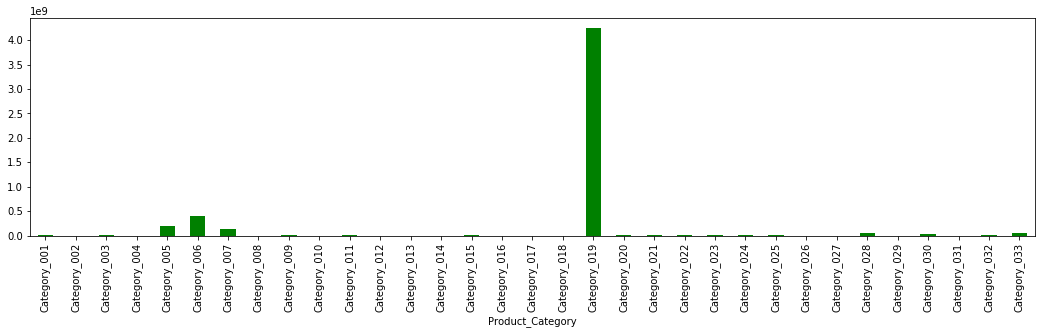

In [90]:
cwd_df.plot.bar(color = 'green',figsize=(18, 4))

From this plot and discussion we found that the demand of the Category_019 is highest

### **Warehouse wise demand** <br>
---
Let's check, which warehouse is producing highest number of demand 

In [91]:
whd_df = hpd_df.groupby("Warehouse")['Order_Demand'].sum()
whd_df.head()

Warehouse
Whse_A    1.478774e+08
Whse_C    5.850714e+08
Whse_J    3.363200e+09
Whse_S    1.038025e+09
Name: Order_Demand, dtype: float64

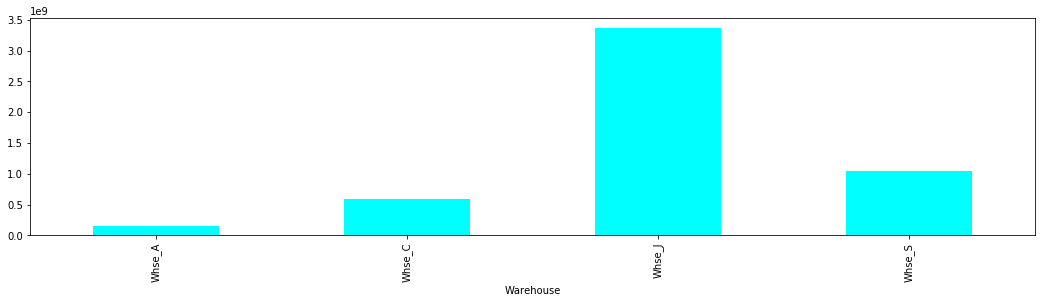

In [92]:
whd_df.plot.bar(color = 'Cyan',figsize=(18, 4))

From this grouping and summation we found most of the order are placed at warehouse J 

### Data Conversion to Numerical representation 
--- 

There is a date field, which is important to determine the product forecasting. 

In [93]:
def year(data):
    array = str(data).split("/")
    return array[0]
def month(data):
    array = str(data).split("/")
    return array[1]
def day(data):
    array = str(data).split("/")
    return array[2]

In [94]:
hpd_df['Year'] = hpd_df['Date'].apply(year).astype(float)
hpd_df['Month'] = hpd_df['Date'].apply(month).astype(float)
hpd_df['Day'] = hpd_df['Date'].apply(day).astype(float)
hpd_df.head()

/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,2012/7/27,100.0,2012.0,7.0,27.0
1,Product_0979,Whse_J,Category_028,2012/1/19,500.0,2012.0,1.0,19.0
2,Product_0979,Whse_J,Category_028,2012/2/3,500.0,2012.0,2.0,3.0
3,Product_0979,Whse_J,Category_028,2012/2/9,500.0,2012.0,2.0,9.0
4,Product_0979,Whse_J,Category_028,2012/3/2,500.0,2012.0,3.0,2.0


#### Removing the Original Date field 

In [95]:
cols = ['Product_Code','Warehouse','Product_Category','Order_Demand','Year','Month','Day']
hpd_df = hpd_df.filter(items = cols)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,Product_0993,Whse_J,Category_028,100.0,2012.0,7.0,27.0
1,Product_0979,Whse_J,Category_028,500.0,2012.0,1.0,19.0
2,Product_0979,Whse_J,Category_028,500.0,2012.0,2.0,3.0
3,Product_0979,Whse_J,Category_028,500.0,2012.0,2.0,9.0
4,Product_0979,Whse_J,Category_028,500.0,2012.0,3.0,2.0


#### Converting Product and Product Category to Numerical value by separating by _

In [96]:
def product_code_update(data):
    return str(data).replace('Product_',"")

In [97]:
hpd_df['Product_Code'] = hpd_df['Product_Code'].apply(product_code_update).astype(float)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,993.0,Whse_J,Category_028,100.0,2012.0,7.0,27.0
1,979.0,Whse_J,Category_028,500.0,2012.0,1.0,19.0
2,979.0,Whse_J,Category_028,500.0,2012.0,2.0,3.0
3,979.0,Whse_J,Category_028,500.0,2012.0,2.0,9.0
4,979.0,Whse_J,Category_028,500.0,2012.0,3.0,2.0


In [98]:
def category_code_update(data):
    return str(data).replace("Category_","")

In [99]:
hpd_df['Product_Category'] = hpd_df['Product_Category'].apply(category_code_update).astype(float)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,993.0,Whse_J,28.0,100.0,2012.0,7.0,27.0
1,979.0,Whse_J,28.0,500.0,2012.0,1.0,19.0
2,979.0,Whse_J,28.0,500.0,2012.0,2.0,3.0
3,979.0,Whse_J,28.0,500.0,2012.0,2.0,9.0
4,979.0,Whse_J,28.0,500.0,2012.0,3.0,2.0


In [100]:
hpd_df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

There are only **Four** types Warehouse we can mannually change them to numerical value. 

In [101]:
def warehouse_update(data):
    if data=="Whse_A":
        return 1
    elif data =="Whse_C":
        return 2
    elif data == "Whse_J":
        return 3
    else:
        return 4

In [102]:
hpd_df['Warehouse'] = hpd_df['Warehouse'].apply(warehouse_update)
hpd_df.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
0,993.0,3,28.0,100.0,2012.0,7.0,27.0
1,979.0,3,28.0,500.0,2012.0,1.0,19.0
2,979.0,3,28.0,500.0,2012.0,2.0,3.0
3,979.0,3,28.0,500.0,2012.0,2.0,9.0
4,979.0,3,28.0,500.0,2012.0,3.0,2.0


## Lets Check Yearwise demand 
---

Lets groupby year and check the output. It will give us trending of the market in terms of demand.

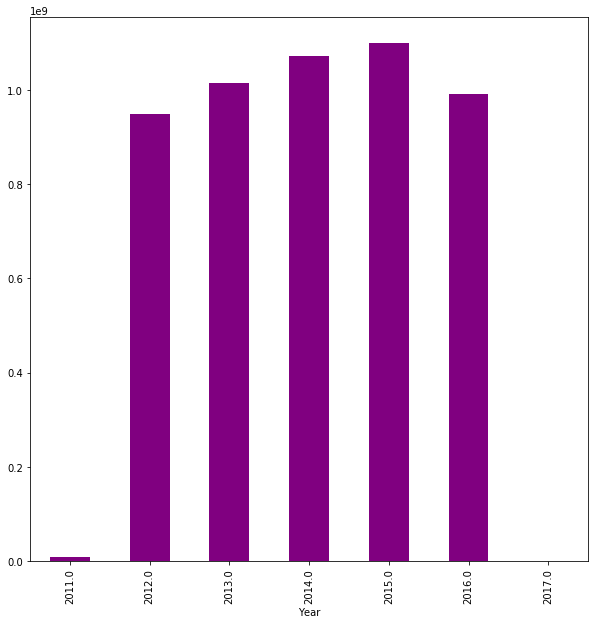

In [103]:
ypd = hpd_df.groupby('Year')['Order_Demand'].sum()
ypd.plot.bar(color='purple')

In [104]:
yppd = hpd_df.groupby(['Year','Product_Category'])['Order_Demand'].sum()
yppd.head()

Year    Product_Category
2011.0  1.0                    997.0
        3.0                   1708.0
        4.0                   2780.0
        5.0                 673750.0
        6.0                 490509.0
Name: Order_Demand, dtype: float64

## Features' Relationship / HeatMap
----

Lets plot a heatmap between features and see the inter relationship 

In [105]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 10,10
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
    plt.show()
    fig.savefig('corr.png')

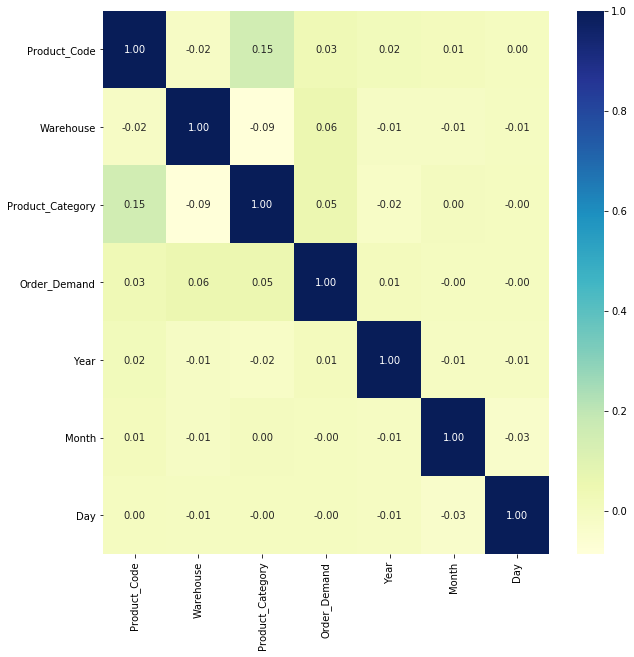

In [106]:
plot_correlation(hpd_df)

### Filtering to Single Product As per Problem Statement. 
---

In [107]:
hpd_df.head()
p1359 = hpd_df[hpd_df.Product_Code== 0979.0]
p1359.describe()

,Product_Code,Warehouse,Product_Category,Order_Demand,Year,Month,Day
count,3889.0,3889.000000,3889.0,3889.000000,3889.000000,3889.000000,3889.000000
mean,979.0,2.310620,28.0,1885.446130,2013.840319,6.553356,15.714580
std,0.0,1.021474,0.0,4405.222077,1.363456,3.410872,8.787986
min,979.0,1.000000,28.0,0.000000,2012.000000,1.000000,1.000000
25%,979.0,1.000000,28.0,200.000000,2013.000000,4.000000,8.000000
50%,979.0,3.000000,28.0,500.000000,2014.000000,7.000000,16.000000
75%,979.0,3.000000,28.0,1200.000000,2015.000000,10.000000,23.000000
max,979.0,4.000000,28.0,97100.000000,2016.000000,12.000000,31.000000


In [108]:
p1359.Warehouse.unique()

array([3, 4, 1])

In [109]:
p1359.Product_Category.unique()

array([28.])

It means there is no much variation in the fields **Product_Code, Warehouse, Product_Category**. Let's drop them as they dont have much contribution in the output. I tried with couples of other products too. There is minumal variation in the terms of warehouse but in the term of Product_Category there is not a variation et all

In [110]:
cols = ['Order_Demand','Year','Month','Day']
p1359 = p1359.filter(items = cols).astype(int)
p1359.head()

,Order_Demand,Year,Month,Day
1,500,2012,1,19
2,500,2012,2,3
3,500,2012,2,9
4,500,2012,3,2
5,500,2012,4,19


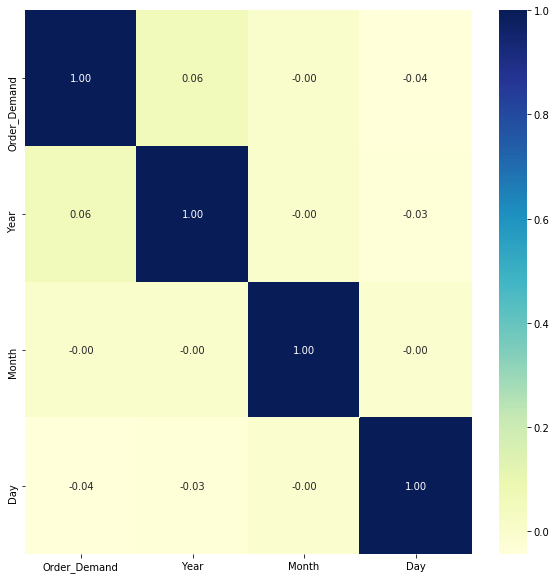

In [111]:
plot_correlation(p1359)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6f5c39650>,
      dtype=object)

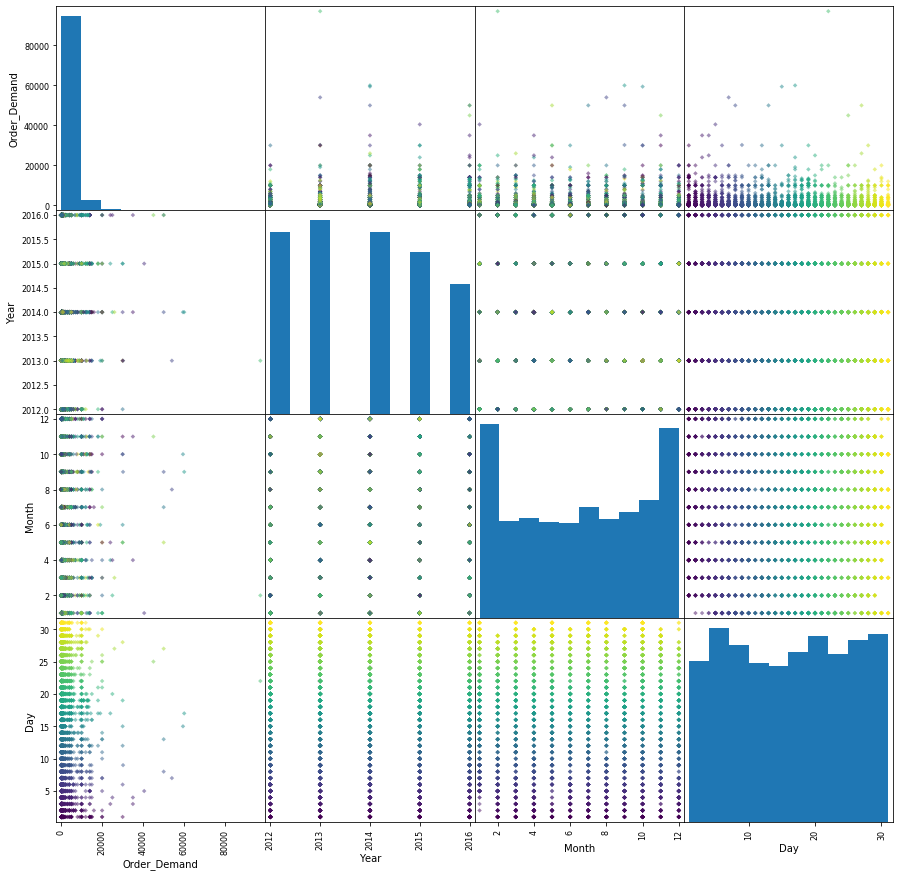

In [112]:
pd.plotting.scatter_matrix(p1359, c=p1359['Day'], figsize = [15,15],s=10, marker = 'D')

### Discussion : from the feature exploration above I found that data is in the form of time series. Its beacuse other factors are not contributing more in the data. So its time series forcasting. I am trying to use YEAR, MONTH, and DAY as three features in the following two models and test my luck. But, from the above exploration, we are almost sure not to get any convincing result

# Conversion in test/train data and Modeling 
----------
**********

### Lets make 70% and 30% train test data set 

In [113]:
#Separating target column at first 
feature_columns = ['Year','Month','Day']
target_columns=['Order_Demand']

# Retaining required columns in each DF 
feature_df = hpd_df[feature_columns]
target_df = hpd_df[target_columns]

x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,train_size=0.7,test_size=0.3,random_state=123)

### Linear Regression 
-----

In [114]:
model = LinearRegression()
# fit model
model.fit(x_train, y_train)
# make a prediction
y_pred = model.predict(x_test)
# summarize prediction
pred_df = pd.DataFrame(data=y_pred, columns=["Order_Demand_Pred"])
pred_df.head()

,Order_Demand_Pred
0,5127.269318
1,5144.822511
2,5298.003555
3,4805.046043
4,5191.450196


In [115]:
y_test.head().reset_index()

,index,Order_Demand
0,696341,3000.0
1,827143,1.0
2,918575,30000.0
3,284577,25000.0
4,759852,5.0


In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7204.691447719516
Mean Squared Error: 839937657.3574932
Root Mean Squared Error: 28981.67795966088


### **Neural Netwrok**
------
We can use **Mult iLayer Perceptron** network to forecast the product demand too. There are no much 


In [117]:
model = MLPRegressor(random_state=1,max_iter=500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/patthar/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [118]:
print(y_pred)

[4978.61477771 4977.85802747 4982.8372218  ... 4969.19199155 4977.75702521
 4984.71207536]


### As these two models are not working greatly I will try to convert data to Time Series and see the trend. There by will produce trend using ARIMA. I came to the conclusion that, there is no need of spending more time in these models

# **ARIMA** ( TIME SERIES FORECASTING ) 
****
----
From all above discussion we found that demand is mostly depending upon the time. Or lets say its Time Series data so, in order to produce a good result we need 

In [139]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

##### Previously I tried by converting Date into Year, Month and Day. Since we are working in time series, I am parsing it to date format itslf. This will make it possible to analyze the data based on trend in the demand

In [148]:
# casting Date to date
raw_df['Date'] = pd.to_datetime(raw_df.Date, format='%Y/%m/%d')
raw_df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


##### Lets remove all other columns other than Date and Demand. Now in the DF I am taking, formatting of demand containing () is to be done and null values of date are also to be removed. TO make it easy to plot trend analysis, I made Date as an index of the Order_Demand. Before that all the orders for a date are summed using group by. There are steps to change order_demand to int too

In [165]:
columns = ['Date','Order_Demand']
time_df = raw_df.filter(items=columns)
time_df['Order_Demand'] = time_df['Order_Demand'].apply(remove_parenthesis)
time_df['Order_Demand'] =time_df['Order_Demand'].astype('int') 
time_df = time_df.dropna()
time_df = time_df.groupby('Date')['Order_Demand'].sum().reset_index()
time_df = time_df.set_index('Date')
time_df.head()

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,92000
2011-09-02,1250
2011-09-27,28


These are valid frequencies we often can use in resampling. they are of great use in time-series data
- B         business day frequency
- C         custom business day frequency (experimental)
- D         calendar day frequency
- W         weekly frequency
- M         month end frequency
- SM        semi-month end frequency (15th and end of month)
- BM        business month end frequency
- CBM       custom business month end frequency
- MS        month start frequency
- SMS       semi-month start frequency (1st and 15th)
- BMS       business month start frequency
- CBMS      custom business month start frequency
- Q         quarter end frequency
- BQ        business quarter endfrequency
- QS        quarter start frequency
- BQS       business quarter start frequency
- A         year end frequency
- BA, BY    business year end frequency
- AS, YS    year start frequency
- BAS, BYS  business year start frequency
- BH        business hour frequency
- H         hourly frequency
- T, min    minutely frequency
- S         secondly frequency
- L, ms     milliseconds
- U, us     microseconds
- N         nanoseconds

Yearly
*****

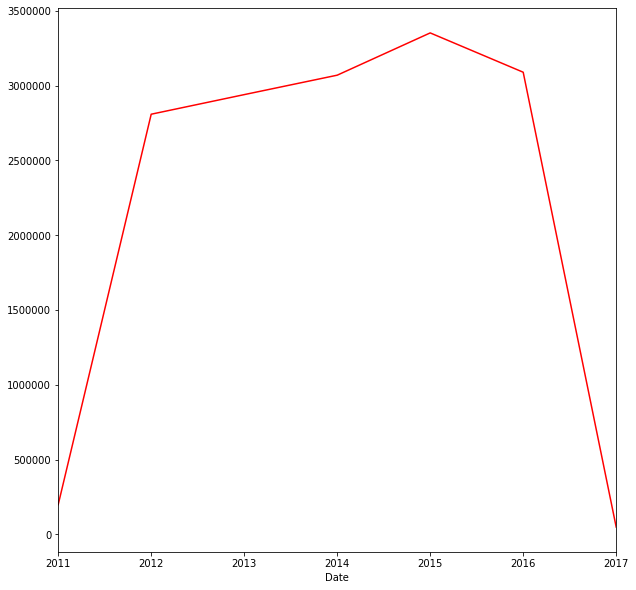

In [175]:
yearly = time_df['Order_Demand'].resample('A').mean()
yearly.plot(color='red')

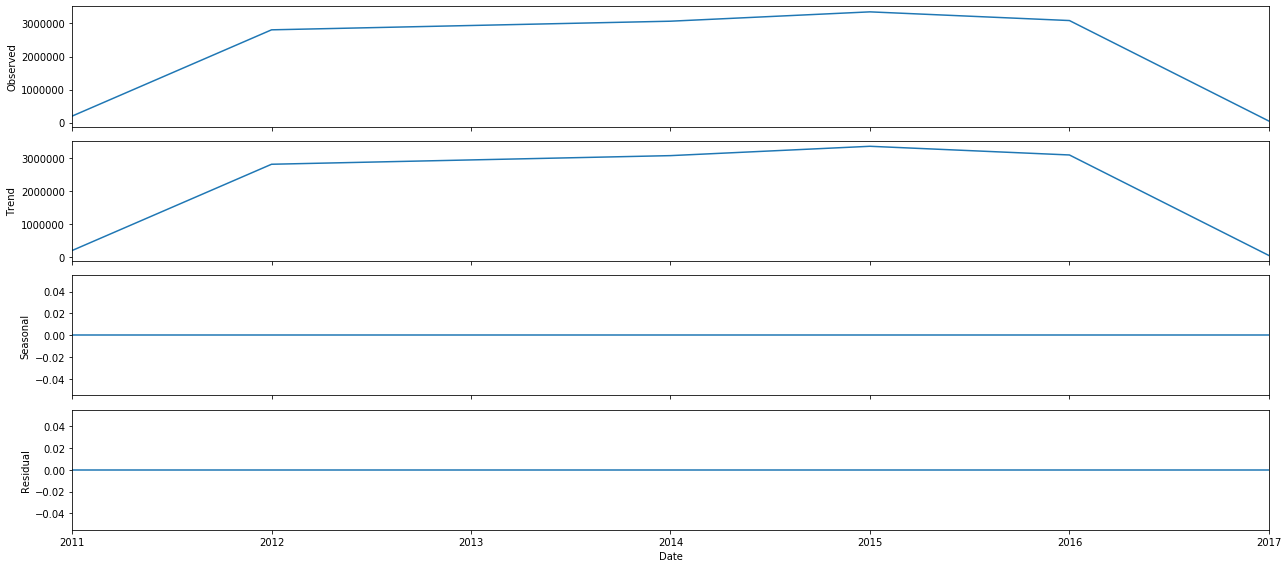

In [197]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(yearly, model='additive')
fig = decomposition.plot()

Monthly 
*****

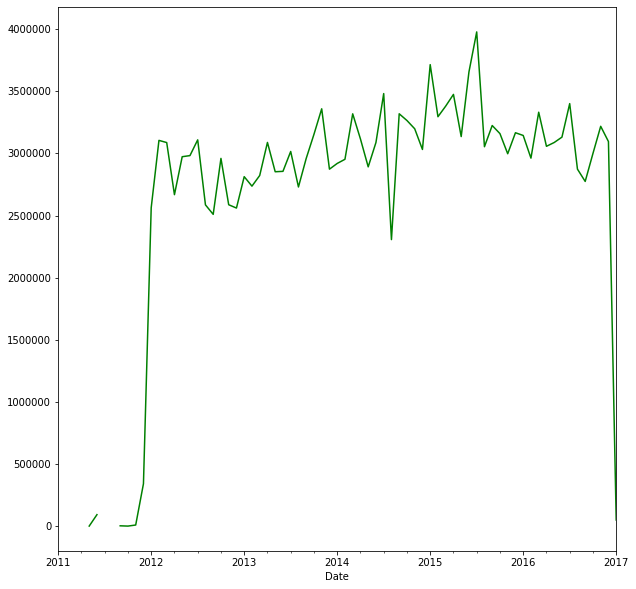

In [177]:
monthly = time_df['Order_Demand'].resample('MS').mean()
monthly.plot(color='green')

##### There are missing months so we have to fill null values to do seasonal decomposition as sm.tsa.seasonal_decompose doesn't handle missing values

In [185]:
monthly = monthly.fillna(monthly.bfill())

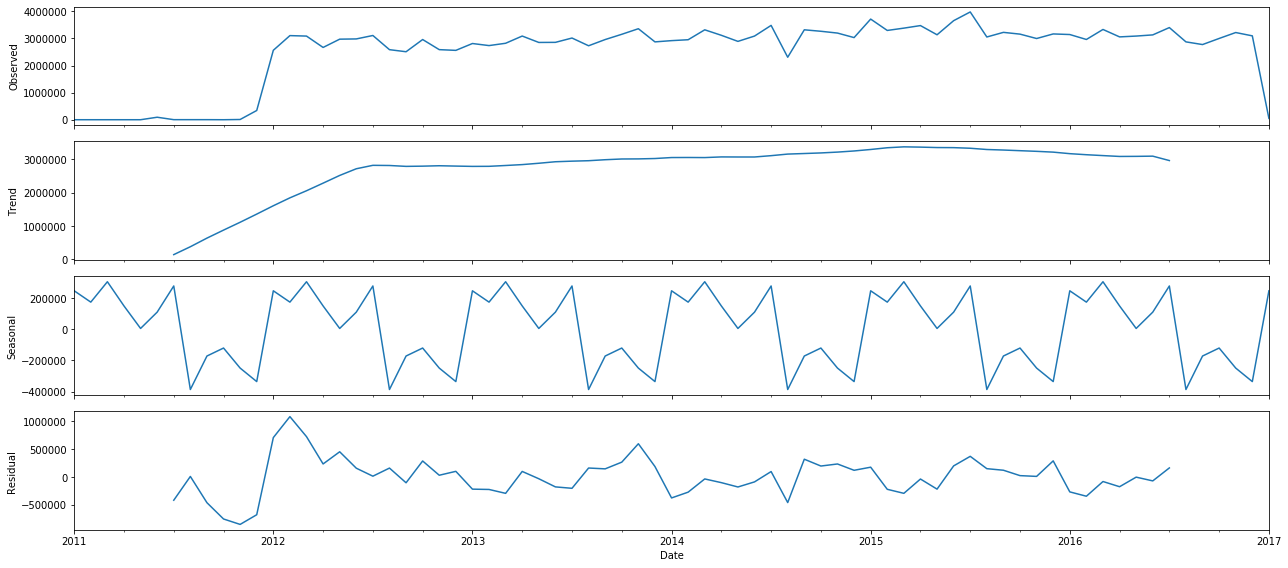

In [192]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')
fig = decomposition.plot()
plt.show()

In [213]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(monthly,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Order_Demand   No. Observations:                   73
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -688.875
Date:                            Mon, 12 Oct 2020   AIC                           1385.749
Time:                                    16:23:44   BIC                           1393.150
Sample:                                01-01-2011   HQIC                          1388.534
                                     - 01-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1169      0.693      0.169      0.866      -1.242       1.476
ma.L1         -0.5515      0.472   

Here order and seasonal order are randomly placed. We can find best fit by looping around 2^3 * 2^4 times to get best fitting params.

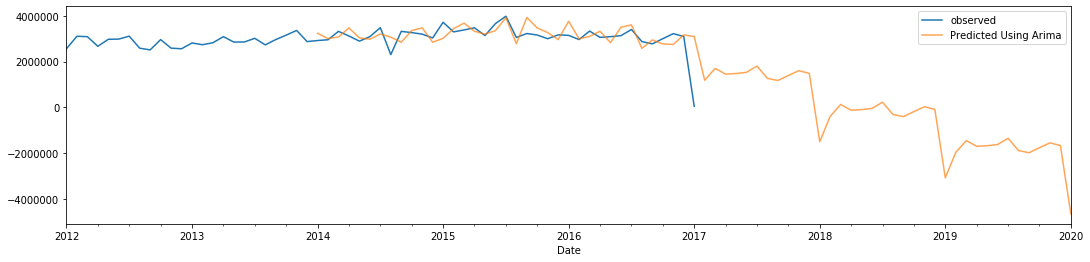

In [220]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), end=pd.to_datetime('2020-01-01'), dynamic=False) 
pred_ci = pred.conf_int()
#Plotting real and forecasted values.
montly_plot = monthly['2012':].plot(label='observed')
# Adding subplot to the original trend
pred.predicted_mean.plot(ax=montly_plot, label='Predicted Using Arima', alpha=.7, figsize=(18, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()